In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


**Section 1**

In [7]:
df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [10]:
df_clean = df.copy()
cols_with_missing = ["Glucose", "BloodPressure", "BMI", "Insulin"]

for col in cols_with_missing:
    df_clean[col] = df_clean[col].replace(0, np.nan)

# df_clean
df_clean = df_clean.fillna(df_clean.mean(numeric_only=True))
df_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [13]:
df_clean.isnull().sum()
# df_clean.head()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigree,0
Age,0
Outcome,0


**Section 2**

In [14]:
selected_cols = ["Glucose", "BloodPressure", "BMI", "Age", "Insulin", "Outcome"]
df_selected = df_clean[selected_cols]
df_selected.head()


,Glucose,BloodPressure,BMI,Age,Insulin,Outcome
0,148.0,72.0,33.6,50,155.548223,1
1,85.0,66.0,26.6,31,155.548223,0
2,183.0,64.0,23.3,32,155.548223,1
3,89.0,66.0,28.1,21,94.000000,0
4,137.0,40.0,43.1,33,168.000000,1


In [15]:
corr_matrix = df_selected.corr()
print(corr_matrix)


                Glucose  BloodPressure       BMI       Age   Insulin   Outcome
Glucose        1.000000       0.218367  0.230941  0.266534  0.420157  0.492928
BloodPressure  0.218367       1.000000  0.281268  0.324595  0.072517  0.166074
BMI            0.230941       0.281268  1.000000  0.025519  0.166586  0.311924
Age            0.266534       0.324595  0.025519  1.000000  0.136734  0.238356
Insulin        0.420157       0.072517  0.166586  0.136734  1.000000  0.214411
Outcome        0.492928       0.166074  0.311924  0.238356  0.214411  1.000000


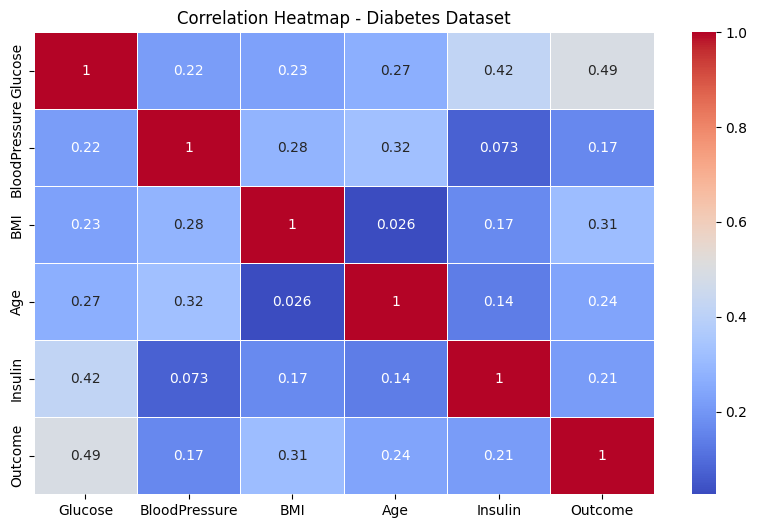

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap - Diabetes Dataset")
plt.show()


**Section 3**

In [17]:
corr_with_outcome = corr_matrix["Outcome"].drop("Outcome")
print("Correlation with Outcome:")
print(corr_with_outcome)

Correlation with Outcome:
Glucose          0.492928
BloodPressure    0.166074
BMI              0.311924
Age              0.238356
Insulin          0.214411
Name: Outcome, dtype: float64


In [18]:
top_feature = corr_with_outcome.idxmax()
top_corr_value = corr_with_outcome.max()

print("\nبیشترین همبستگی با Outcome مربوط به ستون:", top_feature)
print("مقدار همبستگی:", top_corr_value)



بیشترین همبستگی با Outcome مربوط به ستون: Glucose
مقدار همبستگی: 0.49292766761250945
